#### Pridicting Flight Delay By using Advance Machine Learning Algorithms.

**About Dataset**

The dataset contains the following features:
There are 22 columns for the dataset and corresponding column description are given below.  
    
1. Day of Month
2. Day of Week starting from Monday
3. Unique Carrier Code. 
4. An identification number assigned by US DOT to identify a unique airline (carrier). 
5. Code assigned by IATA and commonly used to identify a carrier. 
6. Tail Number
7. Flight Number
8. Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
9. Origin Airport, Airport Sequence ID. 
10. Origin Airport
11. Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
12. Destination Airport, Airport Sequence ID. 
13. Destination Airport.
14. Actual Departure Time (local time: hhmm)
15. Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
16. Departure Time Block, Hourly Intervals
17. Actual Arrival Time (local time: hhmm)
18. Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
19. Cancelled Flight Indicator (1=Yes, 0=No)
20. Diverted Flight Indicator (1=Yes, 0=No)
21. Distance between airports (miles)  
22. Unnamed: 21 - no description available  

**Expected Outcome from the project**

1. Data Preprocessing. 
2. EDA and Feature Engineering
3. Statistical analysis of the data
4. Building and Training the Model
5. Evaluation Metics
6. Hyperparameter tuning
7. Results and Metrics

#### To download the dataset<a href="https://drive.google.com/drive/folders/1TLVlANW6cegman_WNTnXL9dRHRAdl8IU?usp=sharing" title="Google Drive"> Click here </a>

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

##  <mark><span  style= "font-family: Times New Roman">Data loading & cleaning</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [2]:
data1 = pd.read_csv('Jan_2019_ontime.csv')
data1.head(10)

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0             1            2                9E                  20363   
1             1            2                9E                  20363   
2             1            2                9E                  20363   
3             1            2                9E                  20363   
4             1            2                9E                  20363   
5             1            2                9E                  20363   
6             1            2                9E                  20363   
7             1            2                9E                  20363   
8             1            2                9E                  20363   
9             1            2                9E                  20363   

  OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0         9E   N8688C               3280              11953   
1         9E   N348PQ               3281              13487   
2         9E   N8896A               3282              11433   
3         9E   N8886A               3283              15249   
4         9E   N8974C               3284              10397   
5         9E   N927EV               3285              11267   
6         9E   N915XJ               3286              12448   
7         9E   N295PQ               3287              12953   
8         9E   N337PQ               3288              12451   
9         9E   N311PQ               3289              10397   

   ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  \
0                1195302    GNV  ...   ATL     601.0       0.0     0600-0659   
1                1348702    MSP  ...   CVG    1359.0       0.0     1400-1459   
2                1143302    DTW  ...   CVG    1215.0       0.0     1200-1259   
3                1524906    TLH  ...   ATL    1521.0       0.0     1500-1559   
4                1039707    ATL  ...   FSM    1847.0       0.0     1900-1959   
5                1126702    DAY  ...   MSP     853.0       0.0     0900-0959   
6                1244807    JAN  ...   ATL    1553.0       0.0     1500-1559   
7                1295304    LGA  ...   CVG    1551.0       0.0     1500-1559   
8                1245102    JAX  ...   LGA    1037.0       0.0     1000-1059   
9                1039707    ATL  ...   BMI    1245.0       0.0     1200-1259   

   ARR_TIME ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  Unnamed: 21  
0     722.0       0.0        0.0       0.0     300.0          NaN  
1    1633.0       0.0        0.0       0.0     596.0          NaN  
2    1329.0       0.0        0.0       0.0     229.0          NaN  
3    1625.0       0.0        0.0       0.0     223.0          NaN  
4    1940.0       0.0        0.0       0.0     579.0          NaN  
5     953.0       0.0        0.0       0.0     574.0          NaN  
6    1832.0       0.0        0.0       0.0     341.0          NaN  
7    1824.0       0.0        0.0       0.0     585.0          NaN  
8    1239.0       0.0        0.0       0.0     833.0          NaN  
9    1318.0       0.0        0.0       0.0     533.0          NaN  

[10 rows x 22 columns]

In [3]:
#Removing 'Unnamed: 21' column as it contains all null values 
data1 = data1.drop('Unnamed: 21', axis=1)

In [4]:
data1.head(10)

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0             1            2                9E                  20363   
1             1            2                9E                  20363   
2             1            2                9E                  20363   
3             1            2                9E                  20363   
4             1            2                9E                  20363   
5             1            2                9E                  20363   
6             1            2                9E                  20363   
7             1            2                9E                  20363   
8             1            2                9E                  20363   
9             1            2                9E                  20363   

  OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0         9E   N8688C               3280              11953   
1         9E   N348PQ               3281              13487   
2         9E   N8896A               3282              11433   
3         9E   N8886A               3283              15249   
4         9E   N8974C               3284              10397   
5         9E   N927EV               3285              11267   
6         9E   N915XJ               3286              12448   
7         9E   N295PQ               3287              12953   
8         9E   N337PQ               3288              12451   
9         9E   N311PQ               3289              10397   

   ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST_AIRPORT_SEQ_ID  DEST DEP_TIME  \
0                1195302    GNV  ...              1039707   ATL    601.0   
1                1348702    MSP  ...              1119302   CVG   1359.0   
2                1143302    DTW  ...              1119302   CVG   1215.0   
3                1524906    TLH  ...              1039707   ATL   1521.0   
4                1039707    ATL  ...              1177801   FSM   1847.0   
5                1126702    DAY  ...              1348702   MSP    853.0   
6                1244807    JAN  ...              1039707   ATL   1553.0   
7                1295304    LGA  ...              1119302   CVG   1551.0   
8                1245102    JAX  ...              1295304   LGA   1037.0   
9                1039707    ATL  ...              1068502   BMI   1245.0   

   DEP_DEL15  DEP_TIME_BLK ARR_TIME  ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  
0        0.0     0600-0659    722.0        0.0        0.0       0.0     300.0  
1        0.0     1400-1459   1633.0        0.0        0.0       0.0     596.0  
2        0.0     1200-1259   1329.0        0.0        0.0       0.0     229.0  
3        0.0     1500-1559   1625.0        0.0        0.0       0.0     223.0  
4        0.0     1900-1959   1940.0        0.0        0.0       0.0     579.0  
5        0.0     0900-0959    953.0        0.0        0.0       0.0     574.0  
6        0.0     1500-1559   1832.0        0.0        0.0       0.0     341.0  
7        0.0     1500-1559   1824.0        0.0        0.0       0.0     585.0  
8        0.0     1000-1059   1239.0        0.0        0.0       0.0     833.0  
9        0.0     1200-1259   1318.0        0.0        0.0       0.0     533.0  

[10 rows x 21 columns]

In [5]:
data2 = pd.read_csv('Jan_2020_ontime.csv')
data2.head(10)

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0             1            3                EV                  20366   
1             1            3                EV                  20366   
2             1            3                EV                  20366   
3             1            3                EV                  20366   
4             1            3                EV                  20366   
5             1            3                EV                  20366   
6             1            3                EV                  20366   
7             1            3                EV                  20366   
8             1            3                EV                  20366   
9             1            3                EV                  20366   

  OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0         EV   N48901               4397              13930   
1         EV   N16976               4401              15370   
2         EV   N12167               4404              11618   
3         EV   N14902               4405              10781   
4         EV   N606UX               4407              14524   
5         EV   N605UX               4408              13871   
6         EV   N14991               4410              12266   
7         EV   N15986               4411              12266   
8         EV   N603UX               4412              13930   
9         EV   N13975               4414              11618   

   ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  \
0                1393007    ORD  ...   GRB    1003.0       0.0     1000-1059   
1                1537002    TUL  ...   ORD    1027.0       0.0     1000-1059   
2                1161802    EWR  ...   TYS    1848.0       0.0     1800-1859   
3                1078105    BTR  ...   IAH    1846.0       0.0     1800-1859   
4                1452401    RIC  ...   IAH    1038.0       0.0     1000-1059   
5                1387102    OMA  ...   IAH     555.0       0.0     0600-0659   
6                1226603    IAH  ...   SHV    1610.0       0.0     1600-1659   
7                1226603    IAH  ...   HRL    1415.0       0.0     1400-1459   
8                1393007    ORD  ...   ABQ    1938.0       0.0     1900-1959   
9                1161802    EWR  ...   MSN    1011.0       0.0     1000-1059   

   ARR_TIME ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  Unnamed: 21  
0    1117.0       0.0        0.0       0.0     174.0          NaN  
1    1216.0       0.0        0.0       0.0     585.0          NaN  
2    2120.0       0.0        0.0       0.0     631.0          NaN  
3    2004.0       0.0        0.0       0.0     253.0          NaN  
4    1330.0       0.0        0.0       0.0    1157.0          NaN  
5     838.0       0.0        0.0       0.0     781.0          NaN  
6    1718.0       0.0        0.0       0.0     192.0          NaN  
7    1531.0       0.0        0.0       0.0     295.0          NaN  
8    2204.0       0.0        0.0       0.0    1118.0          NaN  
9    1139.0       0.0        0.0       0.0     799.0          NaN  

[10 rows x 22 columns]

In [6]:
#Removing 'Unnamed: 21' column as it contains all null values
data2 = data2.drop('Unnamed: 21', axis=1)

In [7]:
data2.head(10)

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0             1            3                EV                  20366   
1             1            3                EV                  20366   
2             1            3                EV                  20366   
3             1            3                EV                  20366   
4             1            3                EV                  20366   
5             1            3                EV                  20366   
6             1            3                EV                  20366   
7             1            3                EV                  20366   
8             1            3                EV                  20366   
9             1            3                EV                  20366   

  OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0         EV   N48901               4397              13930   
1         EV   N16976               4401              15370   
2         EV   N12167               4404              11618   
3         EV   N14902               4405              10781   
4         EV   N606UX               4407              14524   
5         EV   N605UX               4408              13871   
6         EV   N14991               4410              12266   
7         EV   N15986               4411              12266   
8         EV   N603UX               4412              13930   
9         EV   N13975               4414              11618   

   ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST_AIRPORT_SEQ_ID  DEST DEP_TIME  \
0                1393007    ORD  ...              1197705   GRB   1003.0   
1                1537002    TUL  ...              1393007   ORD   1027.0   
2                1161802    EWR  ...              1541205   TYS   1848.0   
3                1078105    BTR  ...              1226603   IAH   1846.0   
4                1452401    RIC  ...              1226603   IAH   1038.0   
5                1387102    OMA  ...              1226603   IAH    555.0   
6                1226603    IAH  ...              1481402   SHV   1610.0   
7                1226603    IAH  ...              1220605   HRL   1415.0   
8                1393007    ORD  ...              1014005   ABQ   1938.0   
9                1161802    EWR  ...              1348502   MSN   1011.0   

   DEP_DEL15  DEP_TIME_BLK ARR_TIME  ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  
0        0.0     1000-1059   1117.0        0.0        0.0       0.0     174.0  
1        0.0     1000-1059   1216.0        0.0        0.0       0.0     585.0  
2        0.0     1800-1859   2120.0        0.0        0.0       0.0     631.0  
3        0.0     1800-1859   2004.0        0.0        0.0       0.0     253.0  
4        0.0     1000-1059   1330.0        0.0        0.0       0.0    1157.0  
5        0.0     0600-0659    838.0        0.0        0.0       0.0     781.0  
6        0.0     1600-1659   1718.0        0.0        0.0       0.0     192.0  
7        0.0     1400-1459   1531.0        0.0        0.0       0.0     295.0  
8        0.0     1900-1959   2204.0        0.0        0.0       0.0    1118.0  
9        0.0     1000-1059   1139.0        0.0        0.0       0.0     799.0  

[10 rows x 21 columns]

In [8]:
data1.shape, data2.shape

((583985, 21), (607346, 21))

In [9]:
data1.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [10]:
data2.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

Seems like both the dataset contains same columns, we can merge both in a single dataset for better analysis. Let's check for the null values in both dataset.

In [11]:
data1.isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [12]:
data2.isnull().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
OP_CARRIER_AIRLINE_ID       0
OP_CARRIER                  0
TAIL_NUM                  698
OP_CARRIER_FL_NUM           0
ORIGIN_AIRPORT_ID           0
ORIGIN_AIRPORT_SEQ_ID       0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST_AIRPORT_SEQ_ID         0
DEST                        0
DEP_TIME                 6664
DEP_DEL15                6699
DEP_TIME_BLK                0
ARR_TIME                 7075
ARR_DEL15                8078
CANCELLED                   0
DIVERTED                    0
DISTANCE                    0
dtype: int64

All the missing values in the datasets are less than 5%, so we can just drop them.

In [13]:
data1 = data1.dropna()
data2 = data2.dropna()

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565963 entries, 0 to 583984
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           565963 non-null  int64  
 1   DAY_OF_WEEK            565963 non-null  int64  
 2   OP_UNIQUE_CARRIER      565963 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  565963 non-null  int64  
 4   OP_CARRIER             565963 non-null  object 
 5   TAIL_NUM               565963 non-null  object 
 6   OP_CARRIER_FL_NUM      565963 non-null  int64  
 7   ORIGIN_AIRPORT_ID      565963 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  565963 non-null  int64  
 9   ORIGIN                 565963 non-null  object 
 10  DEST_AIRPORT_ID        565963 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    565963 non-null  int64  
 12  DEST                   565963 non-null  object 
 13  DEP_TIME               565963 non-null  float64
 14  DEP_DEL15              565963 non-null  f

In [15]:
#Adding 'YEAR' column to the dataset so we can merge both datasets easily.
data1['YEAR'] = 2019
data1

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0                  1            2                9E                  20363   
1                  1            2                9E                  20363   
2                  1            2                9E                  20363   
3                  1            2                9E                  20363   
4                  1            2                9E                  20363   
...              ...          ...               ...                    ...   
583980            31            4                UA                  19977   
583981            31            4                UA                  19977   
583982            31            4                UA                  19977   
583983            31            4                UA                  19977   
583984            31            4                UA                  19977   

       OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0              9E   N8688C               3280              11953   
1              9E   N348PQ               3281              13487   
2              9E   N8896A               3282              11433   
3              9E   N8886A               3283              15249   
4              9E   N8974C               3284              10397   
...           ...      ...                ...                ...   
583980         UA   N776UA                200              12016   
583981         UA   N36280                174              12016   
583982         UA   N36280                117              14955   
583983         UA   N39726                105              14955   
583984         UA   N39726                104              12016   

        ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  \
0                     1195302    GNV  ...   ATL     601.0       0.0   
1                     1348702    MSP  ...   CVG    1359.0       0.0   
2                     1143302    DTW  ...   CVG    1215.0       0.0   
3                     1524906    TLH  ...   ATL    1521.0       0.0   
4                     1039707    ATL  ...   FSM    1847.0       0.0   
...                       ...    ...  ...   ...       ...       ...   
583980                1201602    GUM  ...   HNL     749.0       0.0   
583981                1201602    GUM  ...   SPN     717.0       0.0   
583982                1495503    SPN  ...   GUM     857.0       0.0   
583983                1495503    SPN  ...   GUM    1820.0       0.0   
583984                1201602    GUM  ...   SPN    1636.0       0.0   

        DEP_TIME_BLK  ARR_TIME ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  YEAR  
0          0600-0659     722.0       0.0        0.0       0.0     300.0  2019  
1          1400-1459    1633.0       0.0        0.0       0.0     596.0  2019  
2          1200-1259    1329.0       0.0        0.0       0.0     229.0  2019  
3          1500-1559    1625.0       0.0        0.0       0.0     223.0  2019  
4          1900-1959    1940.0       0.0        0.0       0.0     579.0  2019  
...              ...       ...       ...        ...       ...       ...   ...  
583980     0700-0759    1832.0       0.0        0.0       0.0    3801.0  2019  
583981     0700-0759     759.0       0.0        0.0       0.0     129.0  2019  
583982     0900-0959     933.0       0.0        0.0       0.0     129.0  2019  
583983     1800-1859    1854.0       0.0        0.0       0.0     129.0  2019  
583984     1600-1659    1719.0       0.0        0.0       0.0     129.0  2019  

[565963 rows x 22 columns]

In [16]:
data1.insert(0, 'YEAR', data1.pop('YEAR'))
data1

YEAR  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  \
0       2019             1            2                9E   
1       2019             1            2                9E   
2       2019             1            2                9E   
3       2019             1            2                9E   
4       2019             1            2                9E   
...      ...           ...          ...               ...   
583980  2019            31            4                UA   
583981  2019            31            4                UA   
583982  2019            31            4                UA   
583983  2019            31            4                UA   
583984  2019            31            4                UA   

        OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  \
0                       20363         9E   N8688C               3280   
1                       20363         9E   N348PQ               3281   
2                       20363         9E   N8896A               3282   
3                       20363         9E   N8886A               3283   
4                       20363         9E   N8974C               3284   
...                       ...        ...      ...                ...   
583980                  19977         UA   N776UA                200   
583981                  19977         UA   N36280                174   
583982                  19977         UA   N36280                117   
583983                  19977         UA   N39726                105   
583984                  19977         UA   N39726                104   

        ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ... DEST_AIRPORT_SEQ_ID  \
0                   11953                1195302  ...             1039707   
1                   13487                1348702  ...             1119302   
2                   11433                1143302  ...             1119302   
3                   15249                1524906  ...             1039707   
4                   10397                1039707  ...             1177801   
...                   ...                    ...  ...                 ...   
583980              12016                1201602  ...             1217305   
583981              12016                1201602  ...             1495503   
583982              14955                1495503  ...             1201602   
583983              14955                1495503  ...             1201602   
583984              12016                1201602  ...             1495503   

        DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  ARR_TIME ARR_DEL15  CANCELLED  \
0        ATL     601.0       0.0     0600-0659     722.0       0.0        0.0   
1        CVG    1359.0       0.0     1400-1459    1633.0       0.0        0.0   
2        CVG    1215.0       0.0     1200-1259    1329.0       0.0        0.0   
3        ATL    1521.0       0.0     1500-1559    1625.0       0.0        0.0   
4        FSM    1847.0       0.0     1900-1959    1940.0       0.0        0.0   
...      ...       ...       ...           ...       ...       ...        ...   
583980   HNL     749.0       0.0     0700-0759    1832.0       0.0        0.0   
583981   SPN     717.0       0.0     0700-0759     759.0       0.0        0.0   
583982   GUM     857.0       0.0     0900-0959     933.0       0.0        0.0   
583983   GUM    1820.0       0.0     1800-1859    1854.0       0.0        0.0   
583984   SPN    1636.0       0.0     1600-1659    1719.0       0.0        0.0   

        DIVERTED  DISTANCE  
0            0.0     300.0  
1            0.0     596.0  
2            0.0     229.0  
3            0.0     223.0  
4            0.0     579.0  
...          ...       ...  
583980       0.0    3801.0  
583981       0.0     129.0  
583982       0.0     129.0  
583983       0.0     129.0  
583984       0.0     129.0  

[565963 rows x 22 columns]

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599268 entries, 0 to 607345
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           599268 non-null  int64  
 1   DAY_OF_WEEK            599268 non-null  int64  
 2   OP_UNIQUE_CARRIER      599268 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  599268 non-null  int64  
 4   OP_CARRIER             599268 non-null  object 
 5   TAIL_NUM               599268 non-null  object 
 6   OP_CARRIER_FL_NUM      599268 non-null  int64  
 7   ORIGIN_AIRPORT_ID      599268 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  599268 non-null  int64  
 9   ORIGIN                 599268 non-null  object 
 10  DEST_AIRPORT_ID        599268 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    599268 non-null  int64  
 12  DEST                   599268 non-null  object 
 13  DEP_TIME               599268 non-null  float64
 14  DEP_DEL15              599268 non-null  f

In [18]:
#Adding 'YEAR' column to the dataset so we can merge both datasets easily.
data2['YEAR'] = 2020
data2

DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0                  1            3                EV                  20366   
1                  1            3                EV                  20366   
2                  1            3                EV                  20366   
3                  1            3                EV                  20366   
4                  1            3                EV                  20366   
...              ...          ...               ...                    ...   
607341            31            5                9E                  20363   
607342            31            5                9E                  20363   
607343            31            5                9E                  20363   
607344            31            5                9E                  20363   
607345            31            5                9E                  20363   

       OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0              EV   N48901               4397              13930   
1              EV   N16976               4401              15370   
2              EV   N12167               4404              11618   
3              EV   N14902               4405              10781   
4              EV   N606UX               4407              14524   
...           ...      ...                ...                ...   
607341         9E   N331CA               4812              15412   
607342         9E   N295PQ               4813              11433   
607343         9E   N294PQ               4814              11996   
607344         9E   N228PQ               4815              10397   
607345         9E   N228PQ               4815              15919   

        ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  \
0                     1393007    ORD  ...   GRB    1003.0       0.0   
1                     1537002    TUL  ...   ORD    1027.0       0.0   
2                     1161802    EWR  ...   TYS    1848.0       0.0   
3                     1078105    BTR  ...   IAH    1846.0       0.0   
4                     1452401    RIC  ...   IAH    1038.0       0.0   
...                       ...    ...  ...   ...       ...       ...   
607341                1541205    TYS  ...   DTW    1002.0       1.0   
607342                1143302    DTW  ...   JFK    1747.0       0.0   
607343                1199603    GSP  ...   LGA     554.0       0.0   
607344                1039707    ATL  ...   XNA    1714.0       0.0   
607345                1591904    XNA  ...   ATL    1841.0       0.0   

        DEP_TIME_BLK  ARR_TIME ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  YEAR  
0          1000-1059    1117.0       0.0        0.0       0.0     174.0  2020  
1          1000-1059    1216.0       0.0        0.0       0.0     585.0  2020  
2          1800-1859    2120.0       0.0        0.0       0.0     631.0  2020  
3          1800-1859    2004.0       0.0        0.0       0.0     253.0  2020  
4          1000-1059    1330.0       0.0        0.0       0.0    1157.0  2020  
...              ...       ...       ...        ...       ...       ...   ...  
607341     0700-0759    1128.0       1.0        0.0       0.0     443.0  2020  
607342     1700-1759    1933.0       0.0        0.0       0.0     509.0  2020  
607343     0600-0659     752.0       0.0        0.0       0.0     610.0  2020  
607344     1700-1759    1811.0       0.0        0.0       0.0     589.0  2020  
607345     1800-1859    2128.0       0.0        0.0       0.0     589.0  2020  

[599268 rows x 22 columns]

In [19]:
data2.insert(0, 'YEAR', data2.pop('YEAR'))
data2

YEAR  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  \
0       2020             1            3                EV   
1       2020             1            3                EV   
2       2020             1            3                EV   
3       2020             1            3                EV   
4       2020             1            3                EV   
...      ...           ...          ...               ...   
607341  2020            31            5                9E   
607342  2020            31            5                9E   
607343  2020            31            5                9E   
607344  2020            31            5                9E   
607345  2020            31            5                9E   

        OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  \
0                       20366         EV   N48901               4397   
1                       20366         EV   N16976               4401   
2                       20366         EV   N12167               4404   
3                       20366         EV   N14902               4405   
4                       20366         EV   N606UX               4407   
...                       ...        ...      ...                ...   
607341                  20363         9E   N331CA               4812   
607342                  20363         9E   N295PQ               4813   
607343                  20363         9E   N294PQ               4814   
607344                  20363         9E   N228PQ               4815   
607345                  20363         9E   N228PQ               4815   

        ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ... DEST_AIRPORT_SEQ_ID  \
0                   13930                1393007  ...             1197705   
1                   15370                1537002  ...             1393007   
2                   11618                1161802  ...             1541205   
3                   10781                1078105  ...             1226603   
4                   14524                1452401  ...             1226603   
...                   ...                    ...  ...                 ...   
607341              15412                1541205  ...             1143302   
607342              11433                1143302  ...             1247805   
607343              11996                1199603  ...             1295304   
607344              10397                1039707  ...             1591904   
607345              15919                1591904  ...             1039707   

        DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  ARR_TIME ARR_DEL15  CANCELLED  \
0        GRB    1003.0       0.0     1000-1059    1117.0       0.0        0.0   
1        ORD    1027.0       0.0     1000-1059    1216.0       0.0        0.0   
2        TYS    1848.0       0.0     1800-1859    2120.0       0.0        0.0   
3        IAH    1846.0       0.0     1800-1859    2004.0       0.0        0.0   
4        IAH    1038.0       0.0     1000-1059    1330.0       0.0        0.0   
...      ...       ...       ...           ...       ...       ...        ...   
607341   DTW    1002.0       1.0     0700-0759    1128.0       1.0        0.0   
607342   JFK    1747.0       0.0     1700-1759    1933.0       0.0        0.0   
607343   LGA     554.0       0.0     0600-0659     752.0       0.0        0.0   
607344   XNA    1714.0       0.0     1700-1759    1811.0       0.0        0.0   
607345   ATL    1841.0       0.0     1800-1859    2128.0       0.0        0.0   

        DIVERTED  DISTANCE  
0            0.0     174.0  
1            0.0     585.0  
2            0.0     631.0  
3            0.0     253.0  
4            0.0    1157.0  
...          ...       ...  
607341       0.0     443.0  
607342       0.0     509.0  
607343       0.0     610.0  
607344       0.0     589.0  
607345       0.0     589.0  

[599268 rows x 22 columns]

In [20]:
#Merging both the datasets
data = pd.merge(data1, data2, how='outer')
data

YEAR  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  \
0        2019             1            2                9E   
1        2019             1            2                9E   
2        2019             1            2                9E   
3        2019             1            2                9E   
4        2019             1            2                9E   
...       ...           ...          ...               ...   
1165226  2020            31            5                9E   
1165227  2020            31            5                9E   
1165228  2020            31            5                9E   
1165229  2020            31            5                9E   
1165230  2020            31            5                9E   

         OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  \
0                        20363         9E   N8688C               3280   
1                        20363         9E   N348PQ               3281   
2                        20363         9E   N8896A               3282   
3                        20363         9E   N8886A               3283   
4                        20363         9E   N8974C               3284   
...                        ...        ...      ...                ...   
1165226                  20363         9E   N331CA               4812   
1165227                  20363         9E   N295PQ               4813   
1165228                  20363         9E   N294PQ               4814   
1165229                  20363         9E   N228PQ               4815   
1165230                  20363         9E   N228PQ               4815   

         ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ... DEST_AIRPORT_SEQ_ID  \
0                    11953                1195302  ...             1039707   
1                    13487                1348702  ...             1119302   
2                    11433                1143302  ...             1119302   
3                    15249                1524906  ...             1039707   
4                    10397                1039707  ...             1177801   
...                    ...                    ...  ...                 ...   
1165226              15412                1541205  ...             1143302   
1165227              11433                1143302  ...             1247805   
1165228              11996                1199603  ...             1295304   
1165229              10397                1039707  ...             1591904   
1165230              15919                1591904  ...             1039707   

         DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  ARR_TIME ARR_DEL15  \
0         ATL     601.0       0.0     0600-0659     722.0       0.0   
1         CVG    1359.0       0.0     1400-1459    1633.0       0.0   
2         CVG    1215.0       0.0     1200-1259    1329.0       0.0   
3         ATL    1521.0       0.0     1500-1559    1625.0       0.0   
4         FSM    1847.0       0.0     1900-1959    1940.0       0.0   
...       ...       ...       ...           ...       ...       ...   
1165226   DTW    1002.0       1.0     0700-0759    1128.0       1.0   
1165227   JFK    1747.0       0.0     1700-1759    1933.0       0.0   
1165228   LGA     554.0       0.0     0600-0659     752.0       0.0   
1165229   XNA    1714.0       0.0     1700-1759    1811.0       0.0   
1165230   ATL    1841.0       0.0     1800-1859    2128.0       0.0   

         CANCELLED  DIVERTED  DISTANCE  
0              0.0       0.0     300.0  
1              0.0       0.0     596.0  
2              0.0       0.0     229.0  
3              0.0       0.0     223.0  
4              0.0       0.0     579.0  
...            ...       ...       ...  
1165226        0.0       0.0     443.0  
1165227        0.0       0.0     509.0  
1165228        0.0       0.0     610.0  
1165229        0.0       0.0     589.0  
1165230        0.0       0.0     589.0  

[1165231 rows x 22 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165231 entries, 0 to 1165230
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   YEAR                   1165231 non-null  int64  
 1   DAY_OF_MONTH           1165231 non-null  int64  
 2   DAY_OF_WEEK            1165231 non-null  int64  
 3   OP_UNIQUE_CARRIER      1165231 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  1165231 non-null  int64  
 5   OP_CARRIER             1165231 non-null  object 
 6   TAIL_NUM               1165231 non-null  object 
 7   OP_CARRIER_FL_NUM      1165231 non-null  int64  
 8   ORIGIN_AIRPORT_ID      1165231 non-null  int64  
 9   ORIGIN_AIRPORT_SEQ_ID  1165231 non-null  int64  
 10  ORIGIN                 1165231 non-null  object 
 11  DEST_AIRPORT_ID        1165231 non-null  int64  
 12  DEST_AIRPORT_SEQ_ID    1165231 non-null  int64  
 13  DEST                   1165231 non-null  object 
 14  DEP_TIME          

In [22]:
data.duplicated().sum()

0

In [23]:
obj_columns = []
for c in data.columns:
    if data[c].dtype == 'object':
        obj_columns.append(c)
print(obj_columns)

['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']


In [24]:
#Dropping the columns having dtype as object
data = data.drop(obj_columns, axis=1)
data

YEAR  DAY_OF_MONTH  DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  \
0        2019             1            2                  20363   
1        2019             1            2                  20363   
2        2019             1            2                  20363   
3        2019             1            2                  20363   
4        2019             1            2                  20363   
...       ...           ...          ...                    ...   
1165226  2020            31            5                  20363   
1165227  2020            31            5                  20363   
1165228  2020            31            5                  20363   
1165229  2020            31            5                  20363   
1165230  2020            31            5                  20363   

         OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
0                     3280              11953                1195302   
1                     3281              13487                1348702   
2                     3282              11433                1143302   
3                     3283              15249                1524906   
4                     3284              10397                1039707   
...                    ...                ...                    ...   
1165226               4812              15412                1541205   
1165227               4813              11433                1143302   
1165228               4814              11996                1199603   
1165229               4815              10397                1039707   
1165230               4815              15919                1591904   

         DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  DEP_TIME  DEP_DEL15  ARR_TIME  \
0                  10397              1039707     601.0        0.0     722.0   
1                  11193              1119302    1359.0        0.0    1633.0   
2                  11193              1119302    1215.0        0.0    1329.0   
3                  10397              1039707    1521.0        0.0    1625.0   
4                  11778              1177801    1847.0        0.0    1940.0   
...                  ...                  ...       ...        ...       ...   
1165226            11433              1143302    1002.0        1.0    1128.0   
1165227            12478              1247805    1747.0        0.0    1933.0   
1165228            12953              1295304     554.0        0.0     752.0   
1165229            15919              1591904    1714.0        0.0    1811.0   
1165230            10397              1039707    1841.0        0.0    2128.0   

         ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  
0              0.0        0.0       0.0     300.0  
1              0.0        0.0       0.0     596.0  
2              0.0        0.0       0.0     229.0  
3              0.0        0.0       0.0     223.0  
4              0.0        0.0       0.0     579.0  
...            ...        ...       ...       ...  
1165226        1.0        0.0       0.0     443.0  
1165227        0.0        0.0       0.0     509.0  
1165228        0.0        0.0       0.0     610.0  
1165229        0.0        0.0       0.0     589.0  
1165230        0.0        0.0       0.0     589.0  

[1165231 rows x 16 columns]

In [25]:
data = data.drop('CANCELLED', axis=1)
data = data.drop('DIVERTED', axis=1)

In [26]:
data

YEAR  DAY_OF_MONTH  DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  \
0        2019             1            2                  20363   
1        2019             1            2                  20363   
2        2019             1            2                  20363   
3        2019             1            2                  20363   
4        2019             1            2                  20363   
...       ...           ...          ...                    ...   
1165226  2020            31            5                  20363   
1165227  2020            31            5                  20363   
1165228  2020            31            5                  20363   
1165229  2020            31            5                  20363   
1165230  2020            31            5                  20363   

         OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
0                     3280              11953                1195302   
1                     3281              13487                1348702   
2                     3282              11433                1143302   
3                     3283              15249                1524906   
4                     3284              10397                1039707   
...                    ...                ...                    ...   
1165226               4812              15412                1541205   
1165227               4813              11433                1143302   
1165228               4814              11996                1199603   
1165229               4815              10397                1039707   
1165230               4815              15919                1591904   

         DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  DEP_TIME  DEP_DEL15  ARR_TIME  \
0                  10397              1039707     601.0        0.0     722.0   
1                  11193              1119302    1359.0        0.0    1633.0   
2                  11193              1119302    1215.0        0.0    1329.0   
3                  10397              1039707    1521.0        0.0    1625.0   
4                  11778              1177801    1847.0        0.0    1940.0   
...                  ...                  ...       ...        ...       ...   
1165226            11433              1143302    1002.0        1.0    1128.0   
1165227            12478              1247805    1747.0        0.0    1933.0   
1165228            12953              1295304     554.0        0.0     752.0   
1165229            15919              1591904    1714.0        0.0    1811.0   
1165230            10397              1039707    1841.0        0.0    2128.0   

         ARR_DEL15  DISTANCE  
0              0.0     300.0  
1              0.0     596.0  
2              0.0     229.0  
3              0.0     223.0  
4              0.0     579.0  
...            ...       ...  
1165226        1.0     443.0  
1165227        0.0     509.0  
1165228        0.0     610.0  
1165229        0.0     589.0  
1165230        0.0     589.0  

[1165231 rows x 14 columns]

Now that we have merged both the dataset and checked for missing values and duplicates values we can move further wuth EDA.

##  <mark><span  style= "font-family: Times New Roman">Exploratory data analysis</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [27]:
data.describe()

YEAR  DAY_OF_MONTH   DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  \
count  1.165231e+06  1.165231e+06  1.165231e+06           1.165231e+06   
mean   2.019514e+03  1.590670e+01  3.894310e+00           1.998762e+04   
std    4.997959e-01  8.989842e+00  1.916468e+00           3.758712e+02   
min    2.019000e+03  1.000000e+00  1.000000e+00           1.939300e+04   
25%    2.019000e+03  8.000000e+00  2.000000e+00           1.979000e+04   
50%    2.020000e+03  1.600000e+01  4.000000e+00           1.997700e+04   
75%    2.020000e+03  2.400000e+01  5.000000e+00           2.036800e+04   
max    2.020000e+03  3.100000e+01  7.000000e+00           2.045200e+04   

       OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
count       1.165231e+06       1.165231e+06           1.165231e+06   
mean        2.571277e+03       1.265602e+04           1.265606e+06   
std         1.820883e+03       1.522537e+03           1.522535e+05   
min         1.000000e+00       1.013500e+04           1.013505e+06   
25%         1.019000e+03       1.129200e+04           1.129202e+06   
50%         2.132000e+03       1.288900e+04           1.288903e+06   
75%         3.998000e+03       1.402700e+04           1.402702e+06   
max         7.439000e+03       1.686900e+04           1.686901e+06   

       DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID      DEP_TIME     DEP_DEL15  \
count     1.165231e+06         1.165231e+06  1.165231e+06  1.165231e+06   
mean      1.265569e+04         1.265573e+06  1.331725e+03  1.542630e-01   
std       1.522703e+03         1.522701e+05  4.962459e+02  3.612008e-01   
min       1.013500e+04         1.013505e+06  1.000000e+00  0.000000e+00   
25%       1.129200e+04         1.129202e+06  9.200000e+02  0.000000e+00   
50%       1.288900e+04         1.288903e+06  1.327000e+03  0.000000e+00   
75%       1.402700e+04         1.402702e+06  1.739000e+03  0.000000e+00   
max       1.686900e+04         1.686901e+06  2.400000e+03  1.000000e+00   

           ARR_TIME     ARR_DEL15      DISTANCE  
count  1.165231e+06  1.165231e+06  1.165231e+06  
mean   1.481148e+03  1.609183e-01  8.010043e+02  
std    5.242425e+02  3.674557e-01  5.902830e+02  
min    1.000000e+00  0.000000e+00  3.100000e+01  
25%    1.101000e+03  0.000000e+00  3.680000e+02  
50%    1.515000e+03  0.000000e+00  6.410000e+02  
75%    1.919000e+03  0.000000e+00  1.042000e+03  
max    2.400000e+03  1.000000e+00  5.095000e+03

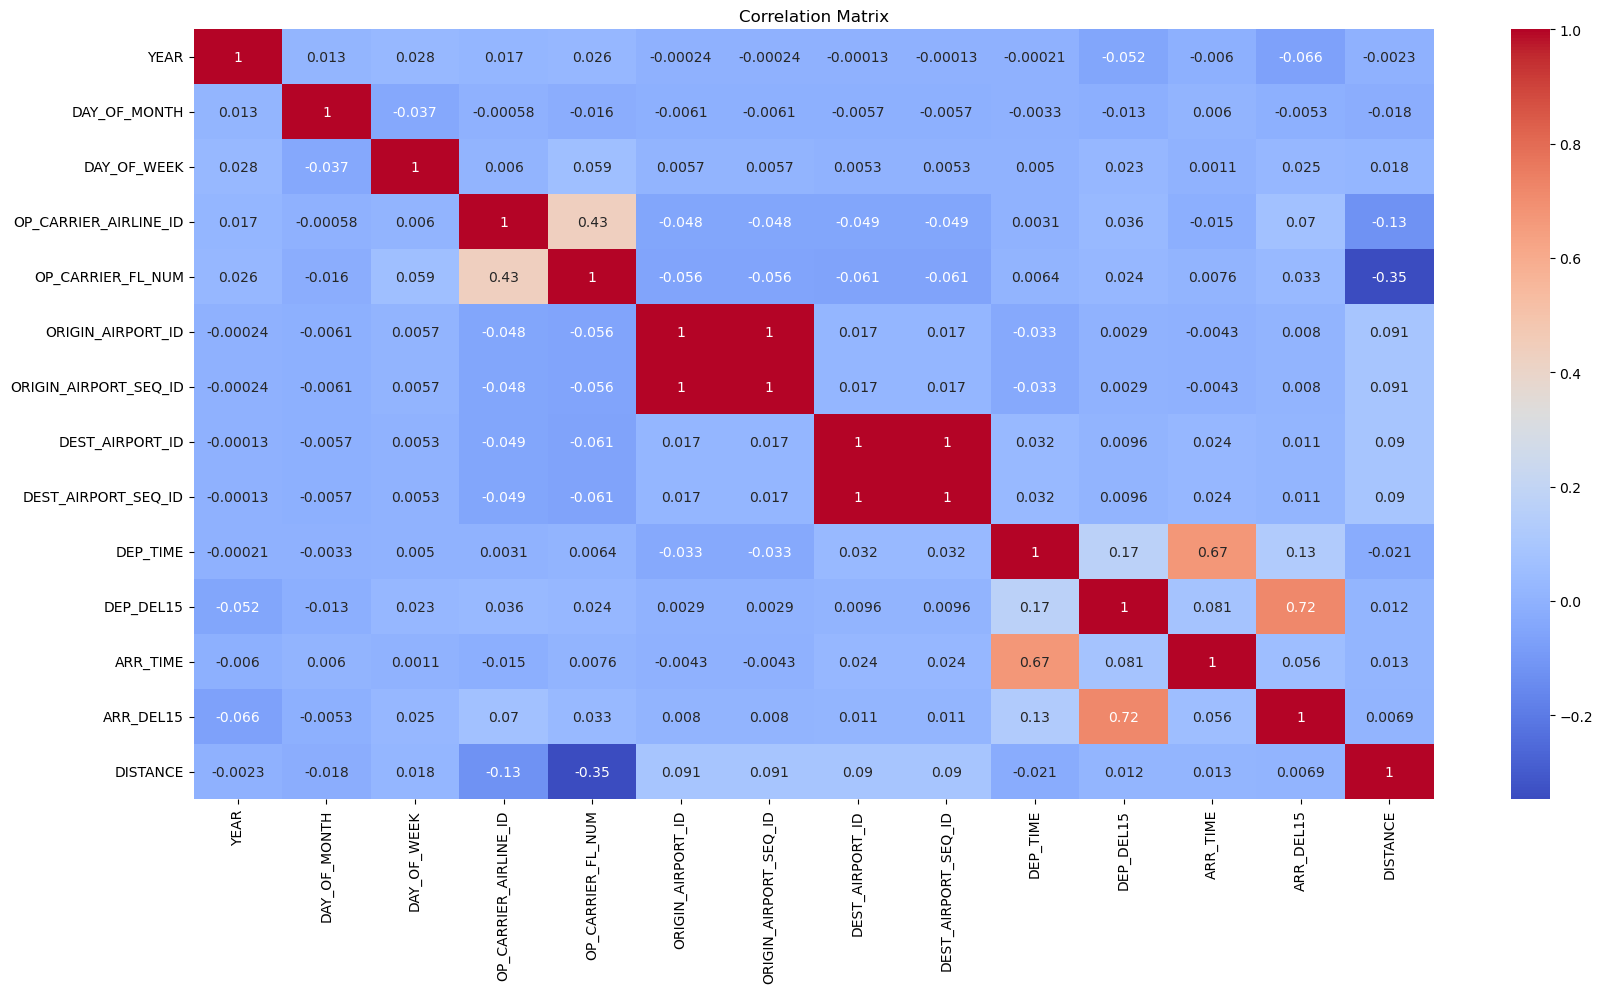

In [28]:
#Heatmap to check correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [29]:
data['YEAR'].value_counts()

YEAR
2020    599268
2019    565963
Name: count, dtype: int64

In [30]:
data['DAY_OF_MONTH'].value_counts()

DAY_OF_MONTH
2     40664
6     39972
24    39912
3     39818
9     39776
10    39686
16    39258
23    39067
17    38929
7     38915
31    38852
14    38571
27    38557
13    38150
8     38131
15    37955
21    37894
30    37581
28    37463
4     37436
5     37168
29    37096
22    36974
20    35853
1     35813
25    35726
26    35035
12    34607
11    34603
18    34423
19    31346
Name: count, dtype: int64

In [31]:
data['DAY_OF_WEEK'].value_counts()

DAY_OF_WEEK
4    199476
3    189630
5    179378
2    165720
1    158477
7    148870
6    123680
Name: count, dtype: int64

In [32]:
data['ARR_DEL15'].value_counts()

ARR_DEL15
0.0    977724
1.0    187507
Name: count, dtype: int64

- Here '1' shows delayed flight and '0' shows not delayed flight.
- Number of delayed flights seems to be far less.

In [33]:
data.groupby('YEAR')['ARR_DEL15'].value_counts().unstack().fillna(0)

ARR_DEL15     0.0     1.0
YEAR                     
2019       460741  105222
2020       516983   82285

- Looking at count of delayed flights in the month of january each year.
- In Jan 2019 more flights compared Jan 2020

In [34]:
data.groupby('DAY_OF_MONTH')['ARR_DEL15'].value_counts().unstack().fillna(0)

ARR_DEL15       0.0   1.0
DAY_OF_MONTH             
1             29719  6094
2             32655  8009
3             32295  7523
4             30494  6942
5             31244  5924
6             33554  6418
7             34289  4626
8             33922  4209
9             36163  3613
10            33598  6088
11            27644  6959
12            28947  5660
13            31851  6299
14            33272  5299
15            33400  4555
16            32006  7252
17            31411  7518
18            26706  7717
19            26586  4760
20            30305  5548
21            31017  6877
22            31291  5683
23            31257  7810
24            31318  8594
25            29472  6254
26            31159  3876
27            32471  6086
28            32453  5010
29            33175  3921
30            32018  5563
31            32032  6820

- Delayed flights on each day of the month.
- The most flights got delayed on 24th day.

In [35]:
data.groupby('DAY_OF_WEEK')['ARR_DEL15'].value_counts().unstack().fillna(0)

ARR_DEL15       0.0    1.0
DAY_OF_WEEK               
1            133186  25291
2            143199  22521
3            162145  27485
4            165062  34414
5            148654  30724
6            100596  23084
7            124882  23988

- Count of flights which got delayed on every day of the week.
- Most flights got delayed on 4th day of the week.

##  <mark><span  style= "font-family: Times New Roman">Model traing and tuning</span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

In [36]:
#Declaring the feature and target variables
y = data['ARR_DEL15']
X = data.drop('ARR_DEL15', axis=1)

In [37]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
#Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
# Evaluate model on testing set
y_pred = xgb_model.predict(X_test)
accuracy = xgb_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9283662785708156


In [41]:
# Define hyperparameter tuning space
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200]
}

In [42]:
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost model and GridSearchCV
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=2, scoring='accuracy')

In [43]:
# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}
Best Accuracy: 0.9312067149148427


In [44]:
# Evaluate best model on testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9342935606602397


##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

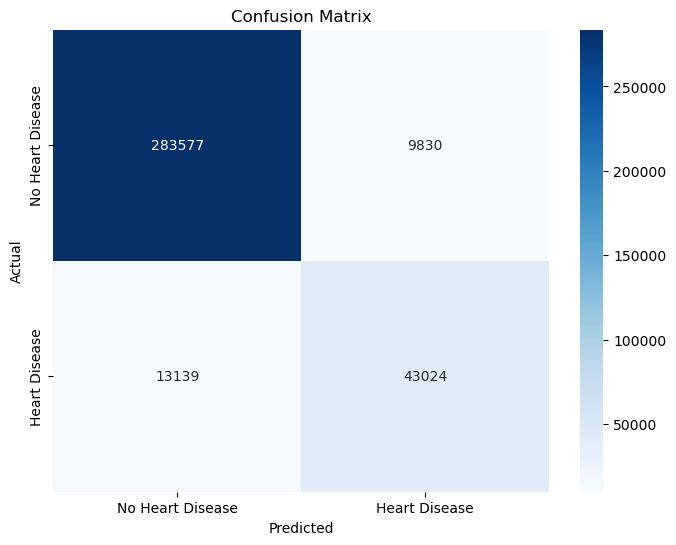

In [48]:
# Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

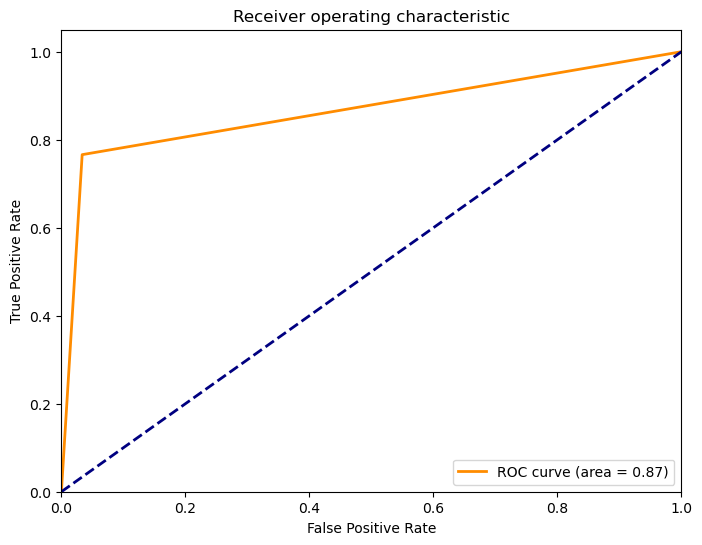

In [51]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [53]:
# Classsification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96    293407
         1.0       0.81      0.77      0.79     56163

    accuracy                           0.93    349570
   macro avg       0.88      0.87      0.88    349570
weighted avg       0.93      0.93      0.93    349570



In [54]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.9342935606602397

- We got got quite good accuracy on our base model, 92.83% but by hypertuning we were able to enhance the accuracy to 93.42%.
- Our roc-auc curve came out good too with area=0.87.